### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [13]:
# Primero importamos el dataset
df = pd.read_csv("../data/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [14]:
# Vamos a cambiar el nombre de la columna Price a Target con el único objetivo de mayor claridad
df['Target'] = df['Price']
df.drop(['Price', 'Address'], axis=1, inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Target
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [15]:
# Instanciamos un objeto de la clase LinearRegression
lm = LinearRegression()

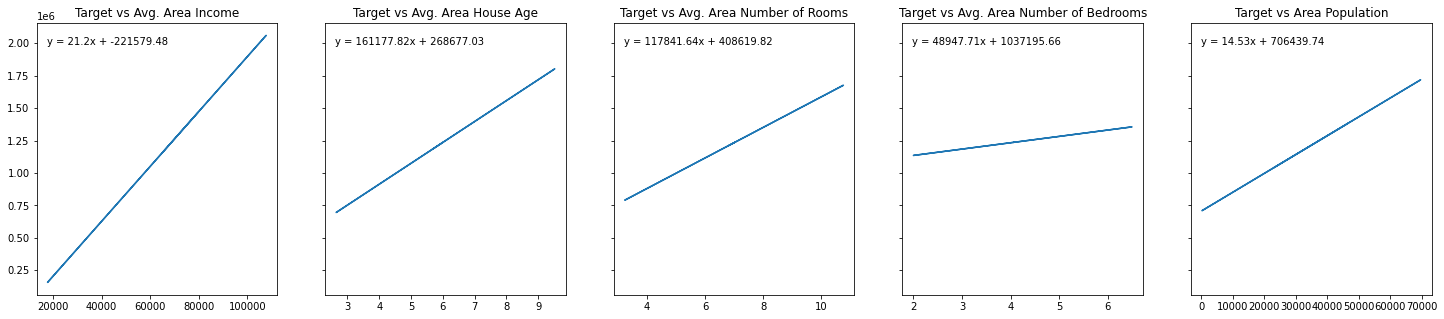

In [16]:
# Como pide el ejercicio, vamos a generar una recta de regresión por cada columna del dataframe y a ver su ecuación
fig, ax = plt.subplots(ncols=len(df.columns) - 1, figsize=(25, 5), sharey=True)
for pos, colum in enumerate(df.columns[:-1]):
    lm.fit(X=df[colum].values.reshape(-1, 1), y=df['Target'])
    ax[pos].set_title(f'Target vs {colum}')
    ax[pos].plot(df[colum], lm.predict(df[colum].values.reshape(-1, 1)))
    ax[pos].annotate(f'y = {round(lm.coef_[0], 2)}x + {round(lm.intercept_, 2)}', xy= (10, 250), xycoords='axes points')

Por el dibujo parece que las columnas 'Avg. Area House Age' y 'Avg. Area Number of Rooms' son la rectas con mayor pendiente y por tanto las columnas cuya variación más afectan al precio. Las columnas 'Area Income' y 'Area Population' tienen el eje x escalado ya que con el mismo intervalo que la demas columnas serían practicamente horizontales.

Vamos a comprobar estas afirmaciones viendo cada pendiente por separado.

In [17]:
for pos in range(len(df.columns) - 1):
    lm.fit(X=df[df.columns[pos]].values.reshape(-1, 1), y=df['Target'])
    print(f'La variación del target con respecto al {df.columns[pos]} es de {lm.coef_[0]}')

La variación del target con respecto al Avg. Area Income es de 21.19548317193168
La variación del target con respecto al Avg. Area House Age es de 161177.82097361935
La variación del target con respecto al Avg. Area Number of Rooms es de 117841.63757442181
La variación del target con respecto al Avg. Area Number of Bedrooms es de 48947.71185752027
La variación del target con respecto al Area Population es de 14.534895022519644


In [18]:
for colum in df.columns[:-1]:
    # Vamos a generar conjuntos de entrenamiento y test por cada regresión
    X_train, X_test, y_train, y_test = train_test_split(df[colum].values.reshape(-1, 1), df['Target'], test_size=0.2, random_state=3)
    # Ahora entrenamos el modelo y comprobamos el R2 por cada columna'
    lm.fit(X_train, y_train)
    print(f'El score de la columna {colum} es {lm.score(X_test, y_test)}')

El score de la columna Avg. Area Income es 0.3920351994371446
El score de la columna Avg. Area House Age es 0.2165002540499138
El score de la columna Avg. Area Number of Rooms es 0.11612724859098644
El score de la columna Avg. Area Number of Bedrooms es 0.024835349623022362
El score de la columna Area Population es 0.1597235064917062


Vemos que la mejor regresión se obtiene con la columna 'Avg. Area Income'